In [1]:
import pandas as pd
import numpy as  np

In [2]:
df = pd.read_csv("D:\\Feature_csv_Files\\newplacementdata.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\soni2\AppData\Local\Temp\ipykernel_7852\4199190329.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\soni2\AppData\Local\Temp\ipykernel_7852\4199190329.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


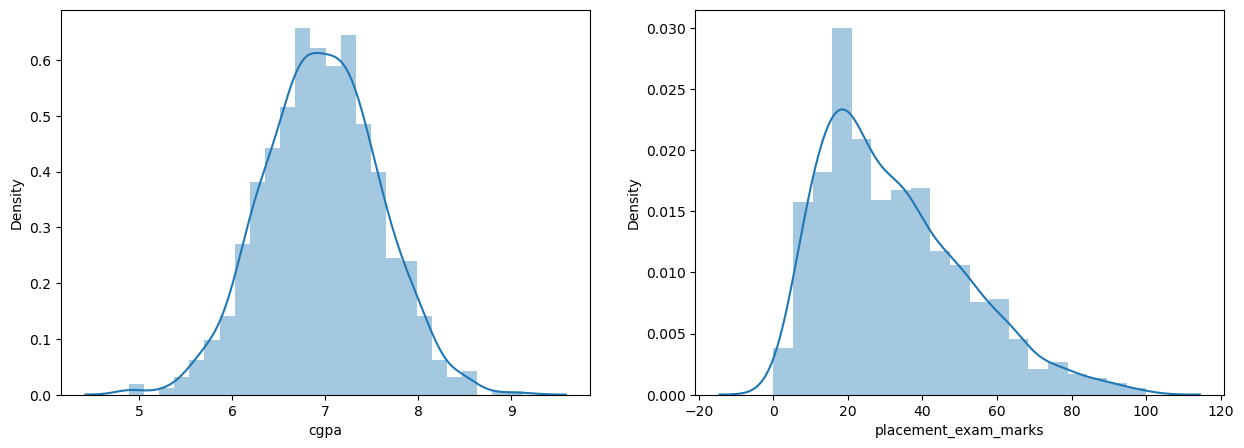

In [8]:
plt.figure(figsize= (15,5))
plt.subplot(121)
sns.distplot(df['cgpa'])
plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [11]:
df['placement_exam_marks'].value_counts()

16     31
18     30
19     29
22     28
17     26
       ..
80      1
83      1
93      1
0       1
100     1
Name: placement_exam_marks, Length: 89, dtype: int64

In [12]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

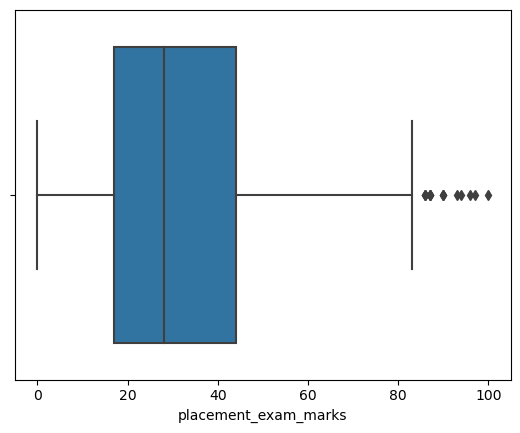

In [14]:
sns.boxplot(x = df['placement_exam_marks'])

In [16]:
per25 = df['placement_exam_marks'].quantile(0.25)
per75 = df['placement_exam_marks'].quantile(0.75)

In [17]:
per25

17.0

In [18]:
per75

44.0

# IQR

In [19]:
IQR = per75 - per25

In [20]:
IQR

27.0

In [21]:
upper_limit = per75 + 1.5*IQR
lower_limit = per25 - 1.5*IQR

In [22]:
upper_limit

84.5

In [23]:
lower_limit

-23.5

# Finding our outliers

In [25]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


# Applying trimming`

In [27]:
newdf = df[df['placement_exam_marks'] < upper_limit]

In [28]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


# Comparision

C:\Users\soni2\AppData\Local\Temp\ipykernel_7852\1415319669.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\soni2\AppData\Local\Temp\ipykernel_7852\1415319669.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['placement_exam_marks'])


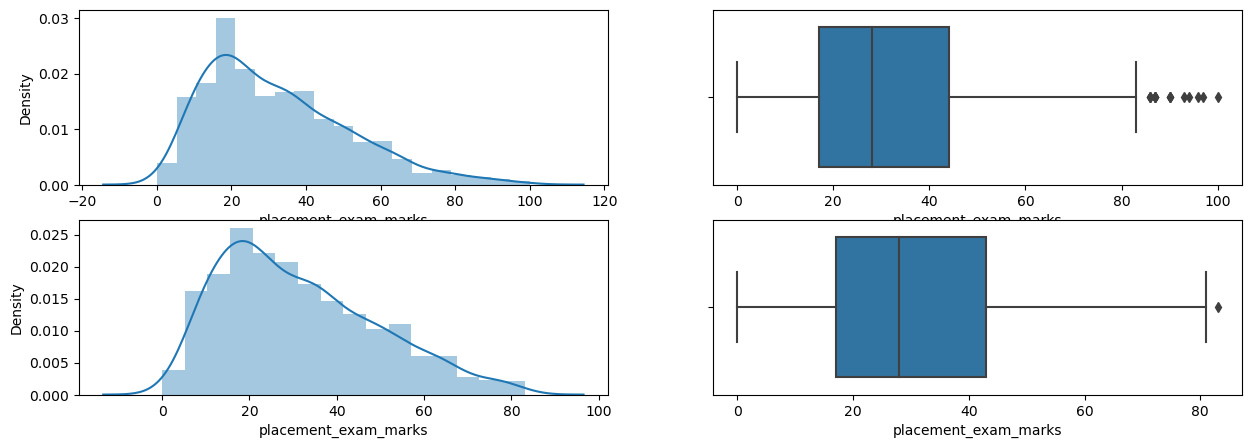

In [45]:
plt.figure(figsize = (15,5))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(x = df["placement_exam_marks"])

plt.subplot(223)
sns.distplot(newdf['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(  x = newdf['placement_exam_marks'])

plt.show()

# Capping``

In [46]:
new_df_capping = df.copy()

In [47]:
#Capping

new_df_capping['placement_exam_marks'] = np.where(
    
    df['placement_exam_marks'] > upper_limit,
    upper_limit,
        
    np.where(
    df['placement_exam_marks'] < lower_limit ,
    lower_limit,
    new_df_capping['placement_exam_marks']
    ))

In [48]:
new_df_capping

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\soni2\AppData\Local\Temp\ipykernel_7852\3112706790.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\soni2\AppData\Local\Temp\ipykernel_7852\3112706790.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_capping['placement_exam_marks'])


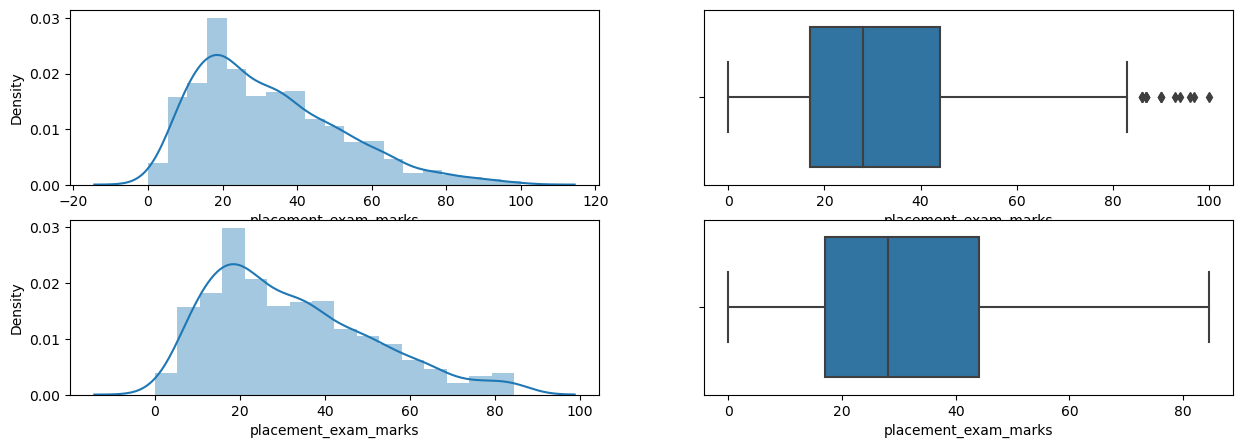

In [49]:
plt.figure(figsize = (15,5))
plt.subplot(221)
sns.distplot(df['placement_exam_marks'])

plt.subplot(222)
sns.boxplot(x = df["placement_exam_marks"])

plt.subplot(223)
sns.distplot(new_df_capping['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(  x = new_df_capping['placement_exam_marks'])

plt.show()